In [ ]:
# default_exp bap_linear_regression

# bap_linear_regression

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
from theano import shared

## Simpling linear regression

In [ ]:
# Generate data

np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

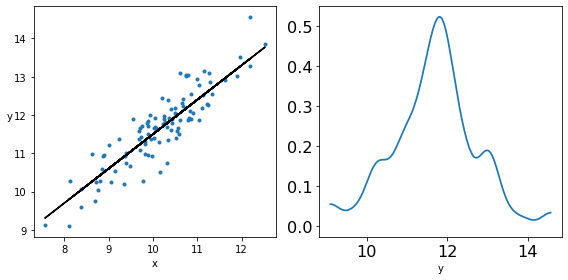

In [ ]:
# Visualize data
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

In [ ]:
# Create model
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    
    trace_g = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.8947112756905402, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8814020806515185, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efff598abd0>,
      dtype=object)

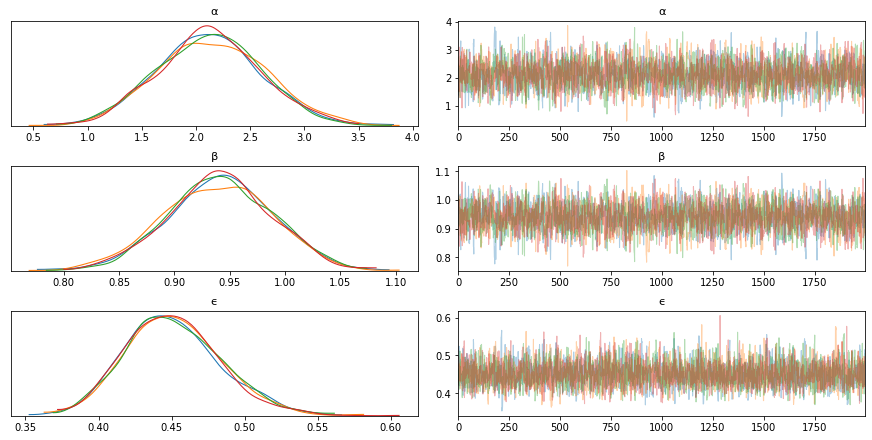

In [ ]:
pm.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])

### Predictive posterior distribution

In [ ]:
ppc = pm.sample_posterior_predictive(trace_g, samples=2000, model=model_g)

/home/jovyan/pymc3/sampling.py:1618: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/opt/conda/lib/python3.7/site-packages/arviz/utils.py:653: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/opt/conda/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (100). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/opt/conda/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (100). Passed array should have shape (chains, draws, *shape)
  UserWarning,


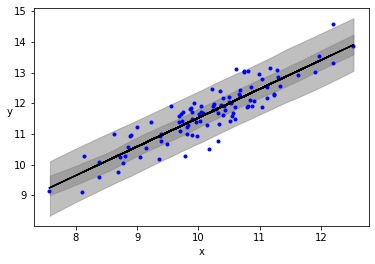

In [ ]:
# Plot sample posterior dist
alpha_m = trace_g['α'].mean()
beta_m = trace_g['β'].mean()

plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hpd(x, ppc['y_pred'], credible_interval=0.5, color='gray')
az.plot_hpd(x, ppc['y_pred'], color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('B11197_03_07.png', dpi=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efffaa72b90>,
      dtype=object)

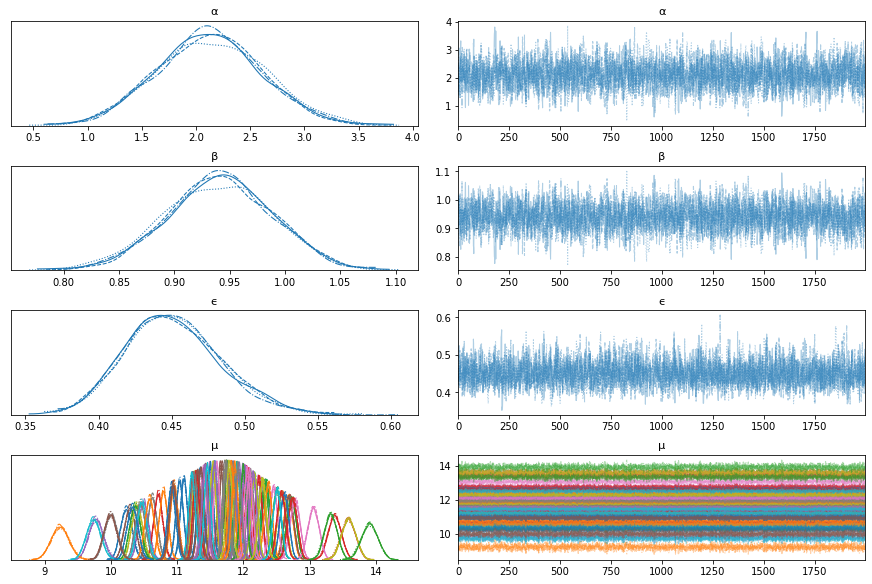

In [ ]:
pm.traceplot(trace_g)